# An introduction to Turing 

[Turing](https://github.com/yebai/Turing.jl) is a general-purpose probabilistic programming system in Julia. Here we describe how to run a very simple Turing program. 
A *probabilistic program* is Julia code wrapped in a `@model` macro. It can use arbitrary Julia code, but to ensure correctness of inference it should not have external effects or modify global state. You can create your own `@model` using any distribution within the Distributions package. The list of such distributions supported is comprehensive: 
https://juliastats.github.io/Distributions.jl/latest/

In [1]:
# Load packages
using Turing, Distributions
using Gadfly
using Mamba: describe

[Turing]: AD chunk size is set as 40


## A simple Gaussian model

In [2]:
@model gdemo(x) = begin
  s ~ InverseGamma(2,3)
  m ~ Normal(0,sqrt(s))
  x[1] ~ Normal(m, sqrt(s))
  x[2] ~ Normal(m, sqrt(s))
  return s, m
end

gdemo (generic function with 2 methods)

## Inference by Markov Chain Monte Carlo

In [3]:
c = sample(gdemo([1.5, 2]), PG(50,300));

[Turing]:  Assume - `s` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `m` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Observe - `x` is an observation
 @~(::ANY, ::ANY) at compiler.jl:57


[PG] Sampling...  0%  ETA: 0:10:00

[PG] Finished with
  Running time    = 2.874565592000001;


[PG] Sampling...100% Time: 0:00:03


In [4]:
# Describe the result.
describe(c)

Iterations = 1:300
Thinning interval = 1
Chains = 1
Samples per chain = 300

Empirical Posterior Estimates:
            Mean        SD       Naive SE       MCSE       ESS   
      m 1.283106302 0.86843765 0.0501392710 0.035349758 300.00000
      s 2.175592527 2.29070718 0.1322540408 0.202269380 128.25635
elapsed 0.009581885 0.10427617 0.0060203875 0.007156029 212.33713
     lp 0.000000000 0.00000000 0.0000000000 0.000000000       NaN

Quantiles:
             2.5%         25.0%       50.0%       75.0%        97.5%   
      m -0.3521089923 0.7327528469 1.215917462 1.656721769 3.2373980851
      s  0.5087202457 0.9997178308 1.599425132 2.486534246 7.1430943429
elapsed  0.0019611206 0.0022366162 0.002290959 0.002341727 0.0064985894
     lp  0.0000000000 0.0000000000 0.000000000 0.000000000 0.0000000000



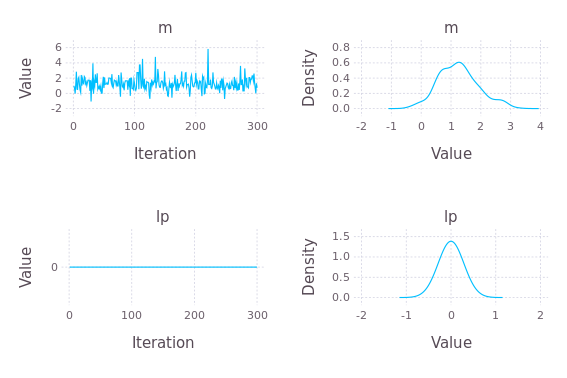

In [5]:
p1 = plot(c);  draw(PNG(15cm, 10cm), gridstack([p1[1] p1[2]; p1[7] p1[8]]));

In [6]:
c2 = sample(gdemo([1.5, 2]), HMC(1000, 0.3, 10));

[Turing]:  Assume - `s` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `m` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Observe - `x` is an observation
 @~(::ANY, ::ANY) at compiler.jl:57


[HMC] Sampling...  0%  ETA: 0:30:32
  ϵ:         0.3
  α:         0.9756066081165262
cond:  [1.0, 1.0]

[HMC] Finished with
  Running time        = 2.574756531999999;
  Accept rate         = 0.974;
  #lf / sample        = 9.99;
  #evals / sample     = 9.992;
  pre-cond. diag mat  = [1.0, 1.0].


[HMC] Sampling...100% Time: 0:00:03


In [7]:
describe(c2)

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

Empirical Posterior Estimates:
             Mean                SD                     Naive SE                     MCSE                ESS   
      m  1.1604957176 0.8011980671679307386412 0.025336107491752322962153 0.027168899420288827872838  869.63236
 lf_num  9.9900000000 0.3162277660168392734441 0.010000000000000041841530 0.009999999999999965513697 1000.00000
      s  1.9916798880 1.7921500866003572394192 0.056672761825251355416455 0.088616947815708183022743  408.99235
elapsed  0.0025806462 0.0445221731926765604270 0.001407914736693485855540 0.001787383588029511178805  620.46484
     lp -5.7192571940 1.0930098516533408581353 0.034564006362273143324604 0.052077944623377663002639  440.49449
 lf_eps  0.3000000000 0.0000000000000013329343 0.000000000000000042151082 0.000000000000000018503717 1000.00000

Quantiles:
             2.5%           25.0%         50.0%         75.0%         97.5%    
      m -0.500

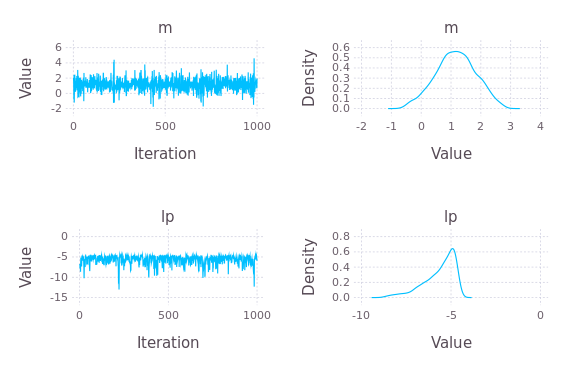

In [8]:
p2 = plot(c2);  draw(PNG(15cm, 10cm), gridstack([p2[1] p2[2]; p2[9] p2[10]]));